## IRIS - Flower Species Classification ML Project

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import mlflow
from mlflow.models import infer_signature

In [2]:
## Set the tracking uri

mlflow.set_tracking_uri("http://localhost:5000")

In [3]:
## load the dataset
X, y = datasets.load_iris(return_X_y=True)

In [4]:
## Split the data into training and test sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20)

# Dfine the model hyperparameters
params = {"penalty":"l2", "solver":"lbfgs",  "max_iter":1000, "multi_class":"auto", "random_state":88}

## train the mode

lr=LogisticRegression(**params)
lr.fit(X_train, y_train)

e:\AnacondaWorkspace\mlops\3_MLFLOW\mlflow\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='auto', random_state=88)

In [5]:
## Prediction on the test set
y_pred=lr.predict(X_test)
y_pred

array([0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2, 2, 1, 2, 1, 2, 1,
       0, 1, 0, 0, 2, 2, 0, 0])

In [6]:
X_test

array([[5.4, 3.9, 1.3, 0.4],
       [5.9, 3.2, 4.8, 1.8],
       [5.9, 3. , 4.2, 1.5],
       [6. , 2.7, 5.1, 1.6],
       [5.7, 2.9, 4.2, 1.3],
       [6. , 2.2, 4. , 1. ],
       [6.8, 3. , 5.5, 2.1],
       [5.4, 3.9, 1.7, 0.4],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.5, 1.6, 0.6],
       [4.9, 2.4, 3.3, 1. ],
       [6. , 2.2, 5. , 1.5],
       [5.5, 2.4, 3.7, 1. ],
       [4.8, 3.4, 1.6, 0.2],
       [7. , 3.2, 4.7, 1.4],
       [6.5, 3.2, 5.1, 2. ],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 2.9, 4.6, 1.3],
       [6.4, 2.7, 5.3, 1.9],
       [5.8, 2.7, 3.9, 1.2],
       [7.4, 2.8, 6.1, 1.9],
       [5.4, 3. , 4.5, 1.5],
       [5.4, 3.4, 1.5, 0.4],
       [5.1, 2.5, 3. , 1.1],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [7.9, 3.8, 6.4, 2. ],
       [6.4, 2.8, 5.6, 2.1],
       [5.5, 3.5, 1.3, 0.2],
       [5.1, 3.5, 1.4, 0.3]])

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9333333333333333


In [8]:
## MLFLOW tracking
mlflow.set_tracking_uri(uri="http://localhost:5000")

## Create a new MLFLOW run
mlflow.set_experiment("IRIS_EXPERIMENT")

## Start a MLFLOW run
with mlflow.start_run():
    ## log the hyperparameter
    mlflow.log_params(params)
    
    ## log the accuracy metrics
    mlflow.log_metric("accuracy", accuracy)
    
    ## Set a tag that we can us9e to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "Basic LR model for IRIS dataset")
    
    ## Infer the nodel signature
    signature=infer_signature(X_train, lr.predict(X_train))
    
    ## Log the model
    model_info=mlflow.sklearn.log_model(
    
        sk_model=lr,
        artifact_path="iris_model",
        signature=signature,
        input_example=X_train,
        registered_model_name="iris-mlflow-tracking"
    
    )

Registered model 'iris-mlflow-tracking' already exists. Creating a new version of this model...
2025/01/06 04:12:19 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: iris-mlflow-tracking, version 2


🏃 View run luminous-mole-1000 at: http://localhost:5000/#/experiments/963168682201194683/runs/8cf9c076e29a48bdb1965ec7edd866bb
🧪 View experiment at: http://localhost:5000/#/experiments/963168682201194683


Created version '2' of model 'iris-mlflow-tracking'.


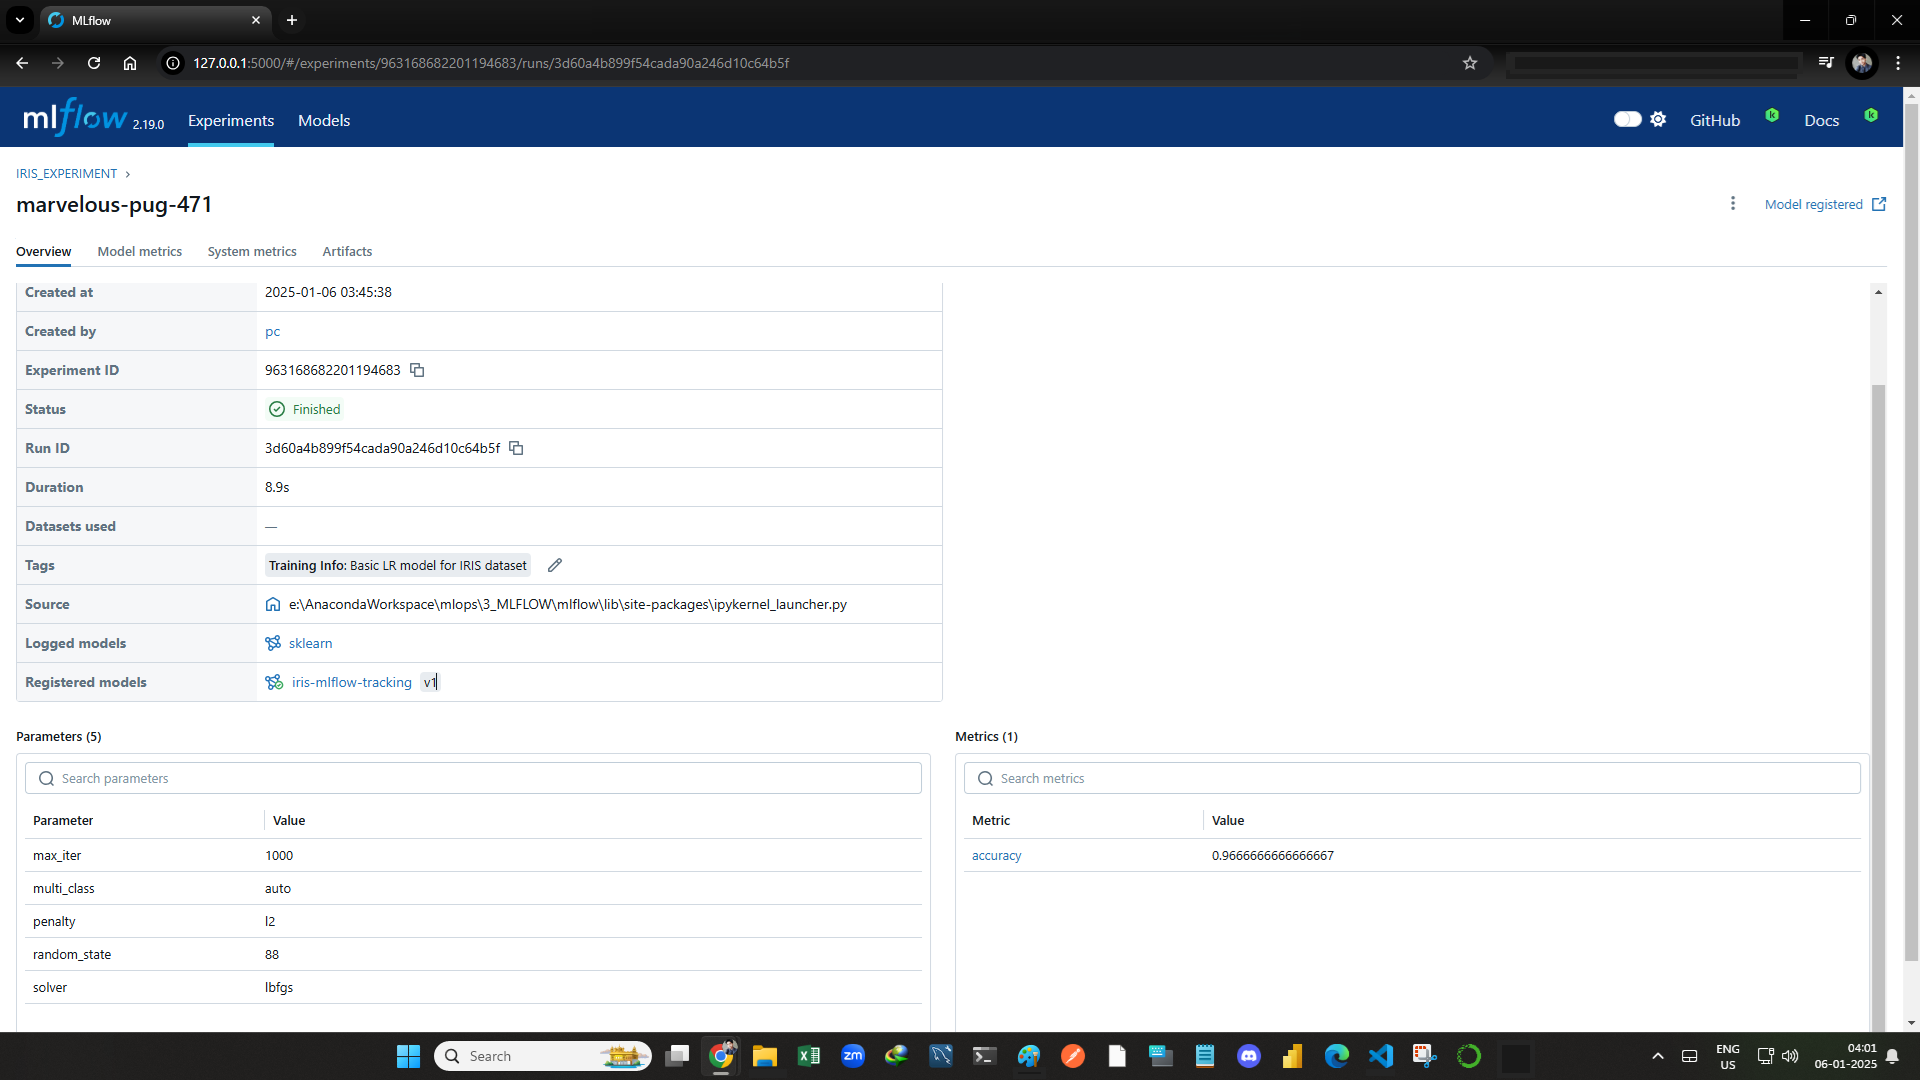

In [9]:
# Updated the model hyperparameters
params = {"solver":"newton-cg",  "max_iter":1000, "multi_class":"auto", "random_state":1000}

## train the mode

lr=LogisticRegression(**params)
lr.fit(X_train, y_train)

e:\AnacondaWorkspace\mlops\3_MLFLOW\mlflow\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='auto', random_state=1000,
                   solver='newton-cg')

In [10]:
## Prediction on the test set
y_pred=lr.predict(X_test)
y_pred

array([0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2, 2, 1, 2, 1, 2, 1,
       0, 1, 0, 0, 2, 2, 0, 0])

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9333333333333333


In [12]:
## MLFLOW tracking
mlflow.set_tracking_uri(uri="http://localhost:5000")

## Create a new MLFLOW run
mlflow.set_experiment("IRIS_EXPERIMENT")

## Start a MLFLOW run
with mlflow.start_run():
    ## log the hyperparameter
    mlflow.log_params(params)
    
    ## log the accuracy metrics
    mlflow.log_metric("accuracy", accuracy)
    
    ## Set a tag that we can us9e to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "Basic LR model for IRIS dataset")
    
    ## Infer the nodel signature
    signature=infer_signature(X_train, lr.predict(X_train))
    
    ## Log the model
    model_info=mlflow.sklearn.log_model(
    
        sk_model=lr,
        artifact_path="iris_model",
        signature=signature,
        input_example=X_train,
        registered_model_name="iris-mlflow-tracking"
    
    )

Registered model 'iris-mlflow-tracking' already exists. Creating a new version of this model...
2025/01/06 04:15:49 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: iris-mlflow-tracking, version 3


🏃 View run grandiose-foal-717 at: http://localhost:5000/#/experiments/963168682201194683/runs/608e30a5013a42a78cc2d16d04599b69
🧪 View experiment at: http://localhost:5000/#/experiments/963168682201194683


Created version '3' of model 'iris-mlflow-tracking'.


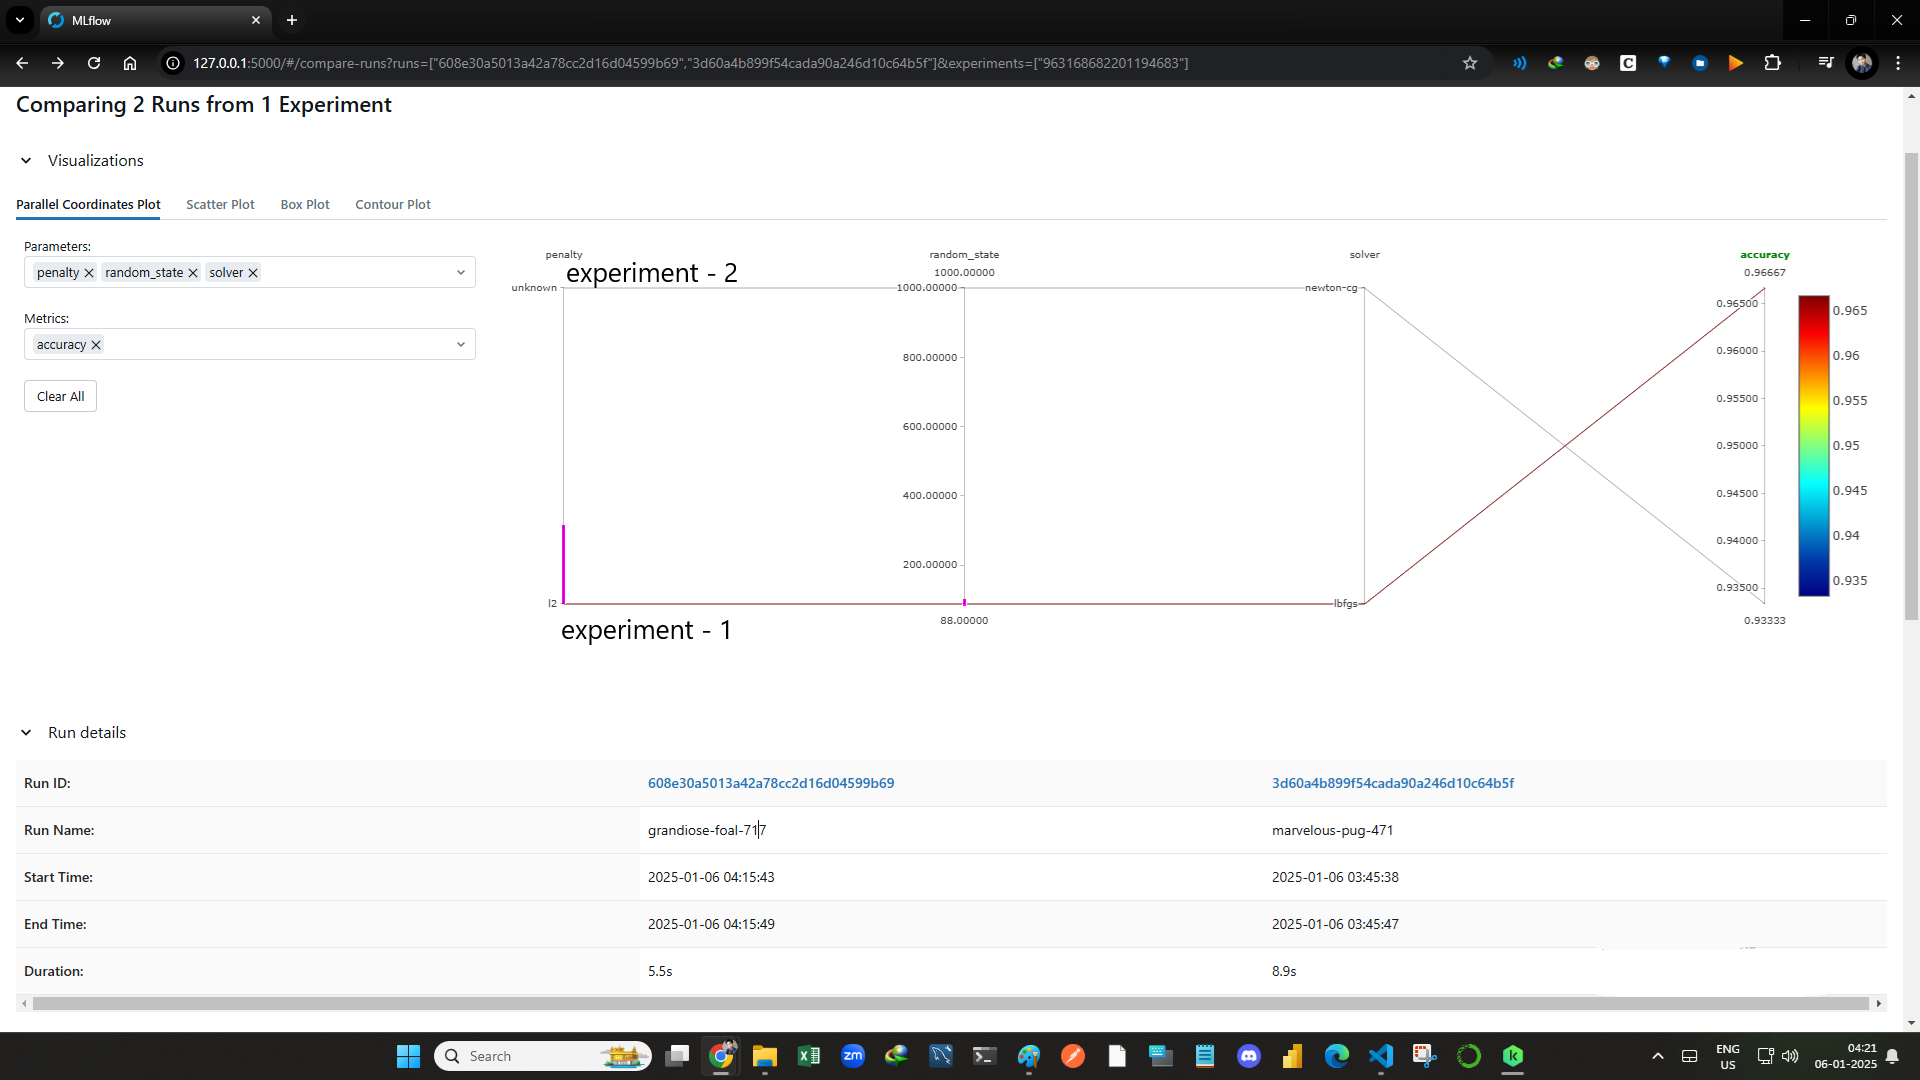